In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

start = "2015-01-01"
end = "2024-12-31"

# Use yfinance instead of DataReader
df = yf.download("AAPL", start=start, end=end)

print(df.head())


C:\Users\BIDISHA BISWAS\AppData\Local\Temp\ipykernel_24976\130199604.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261044  24.729267  23.821668  24.718171  212818400
2015-01-05  23.577572  24.110148  23.391171  24.030261  257142000
2015-01-06  23.579792  23.839422  23.218083  23.641926  263188400
2015-01-07  23.910433  24.010290  23.677430  23.788384  160423600
2015-01-08  24.829130  24.886826  24.121248  24.238859  237458000


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.367020,254.745665,252.553450,253.868788,40858800
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300
2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500


In [4]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.261044,24.729267,23.821668,24.718171,212818400
1,2015-01-05,23.577572,24.110148,23.391171,24.030261,257142000
2,2015-01-06,23.579792,23.839422,23.218083,23.641926,263188400
3,2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
4,2015-01-08,24.829130,24.886826,24.121248,24.238859,237458000


In [5]:
df = df.drop(['Date'] , axis=1)
df.head()

C:\Users\BIDISHA BISWAS\AppData\Local\Temp\ipykernel_24976\318439593.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'] , axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.261044,24.729267,23.821668,24.718171,212818400
1,23.577572,24.110148,23.391171,24.030261,257142000
2,23.579792,23.839422,23.218083,23.641926,263188400
3,23.910433,24.010290,23.677430,23.788384,160423600
4,24.829130,24.886826,24.121248,24.238859,237458000


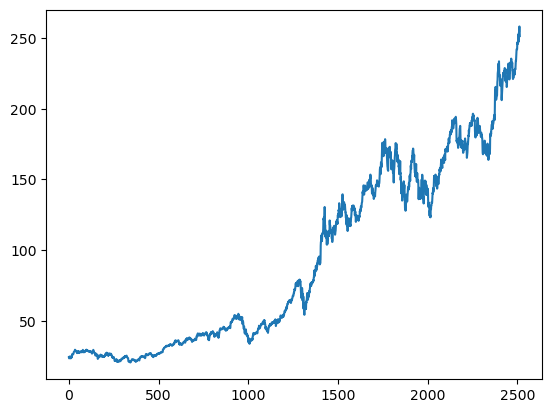

In [6]:
plt.plot(df.Close)

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.261044,24.729267,23.821668,24.718171,212818400
1,23.577572,24.110148,23.391171,24.030261,257142000
2,23.579792,23.839422,23.218083,23.641926,263188400
3,23.910433,24.010290,23.677430,23.788384,160423600
4,24.829130,24.886826,24.121248,24.238859,237458000
...,...,...,...,...,...
2510,254.367020,254.745665,252.553450,253.868788,40858800
2511,257.286682,257.296626,254.386957,254.586262,23234700
2512,258.103729,259.179926,256.718662,257.276679,27237100


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,228.410515
2511,228.797497
2512,229.297937
2513,229.784480


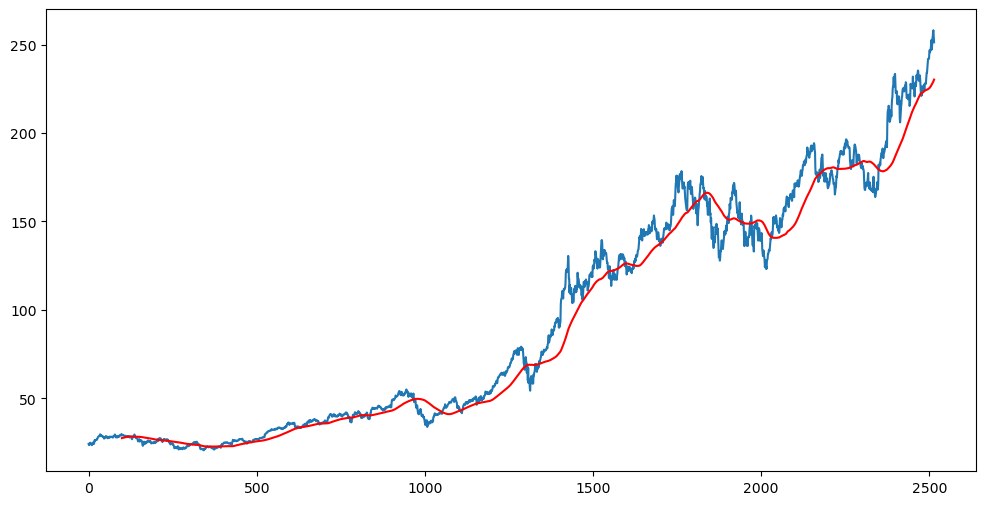

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,210.238068
2511,210.666910
2512,211.097455
2513,211.521335


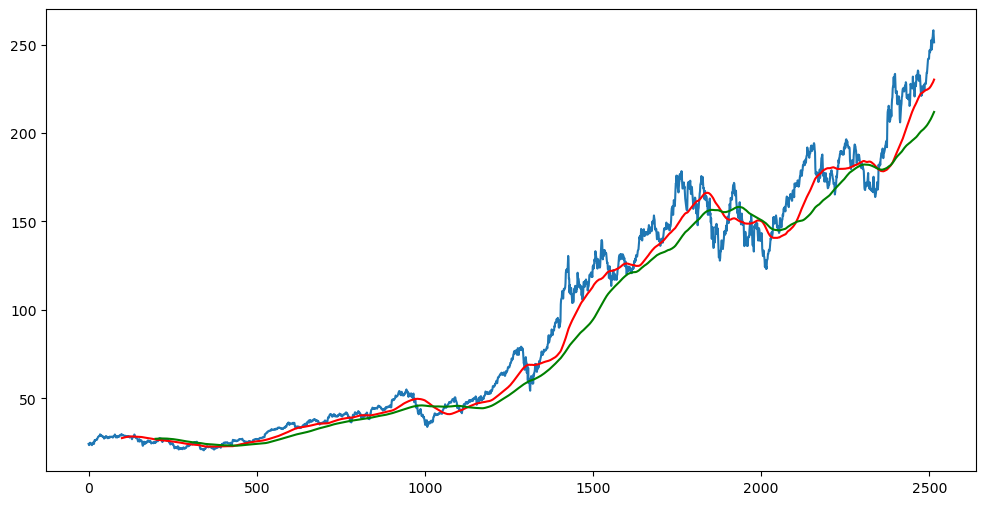

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2515, 5)

In [43]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()

Ticker,AAPL
0,24.261044
1,23.577572
2,23.579792
3,23.910433
4,24.829130


In [15]:
data_testing.head()

Ticker,AAPL
1760,175.864670
1761,174.707809
1762,174.090164
1763,178.443130
1764,176.178406


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02328838],
       [0.01891198],
       [0.01892619],
       ...,
       [0.9745751 ],
       [1.        ],
       [0.99347086]], shape=(1760, 1))

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
#ML Model

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))




model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))




model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

C:\Users\BIDISHA BISWAS\anaconda3\envs\stocks\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 315ms/step - loss: 0.0275
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - loss: 0.0061
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - loss: 0.0047
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 374ms/step - loss: 0.0041
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 327ms/step - loss: 0.0038
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - loss: 0.0048
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - loss: 0.0040
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 294ms/step - loss: 0.0056
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - loss: 0.0043
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - loss: 0.0033
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 280ms/step - loss: 0.0033
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - loss: 0.0033
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - loss: 0.0032
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step - loss: 0.0032
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

Ticker,AAPL
1760,175.864670
1761,174.707809
1762,174.090164
1763,178.443130
1764,176.178406


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [28]:
final_df.head()

Ticker,AAPL
0,143.067245
1,143.018356
2,142.538666
3,142.793167
4,145.759476


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.46755426e-01],
       [1.46392807e-01],
       [1.42834863e-01],
       [1.44722542e-01],
       [1.66724142e-01],
       [1.68248862e-01],
       [1.82916369e-01],
       [1.76163779e-01],
       [1.48353258e-01],
       [1.50821874e-01],
       [1.61641365e-01],
       [1.72678155e-01],
       [1.72024784e-01],
       [1.62875559e-01],
       [1.56921207e-01],
       [1.64618371e-01],
       [1.97439009e-01],
       [1.88071919e-01],
       [1.93009716e-01],
       [2.01287252e-01],
       [2.06007410e-01],
       [2.23361399e-01],
       [2.11888537e-01],
       [2.04337031e-01],
       [1.67304853e-01],
       [1.71516280e-01],
       [1.61132974e-01],
       [1.67740358e-01],
       [1.65997546e-01],
       [1.46174715e-01],
       [1.23519858e-01],
       [1.27077802e-01],
       [1.44649995e-01],
       [1.51765770e-01],
       [1.52419480e-01],
       [1.41164598e-01],
       [1.16041124e-01],
       [1.22721055e-01],
       [1.13063665e-01],
       [1.21414087e-01],


In [30]:
input_data.shape

(855, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i ,0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [36]:
# Making Predictions

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step


In [37]:
y_predicted.shape

(755, 1)

In [38]:
y_test

array([3.90019332e-01, 3.81438708e-01, 3.76857531e-01, 4.09144200e-01,
       3.92346363e-01, 3.57586891e-01, 3.36353423e-01, 3.37589541e-01,
       3.37735087e-01, 3.58750689e-01, 3.62022862e-01, 3.37735087e-01,
       3.44134338e-01, 3.20355521e-01, 2.94394764e-01, 2.81887579e-01,
       2.66616839e-01, 2.60871863e-01, 2.47491744e-01, 2.46837355e-01,
       2.43419524e-01, 3.24209309e-01, 3.56568864e-01, 3.55332745e-01,
       3.64277460e-01, 3.42898220e-01, 3.40786564e-01, 3.35471321e-01,
       3.58552403e-01, 3.69109889e-01, 3.38820680e-01, 3.13482737e-01,
       3.15230076e-01, 3.43699060e-01, 3.41951494e-01, 3.15230076e-01,
       3.03725751e-01, 2.82028484e-01, 2.51083981e-01, 2.70524386e-01,
       2.85887366e-01, 2.87853023e-01, 2.73873292e-01, 2.98337962e-01,
       2.95935103e-01, 2.73654974e-01, 2.45477421e-01, 2.31934779e-01,
       2.72053180e-01, 2.39797975e-01, 2.12202604e-01, 1.82277598e-01,
       2.14824008e-01, 2.47588850e-01, 2.55088408e-01, 2.79552625e-01,
      

In [39]:
y_predicted

array([[0.36982715],
       [0.372996  ],
       [0.37660813],
       [0.38040245],
       [0.384431  ],
       [0.38857684],
       [0.39229715],
       [0.3948793 ],
       [0.3958946 ],
       [0.39520818],
       [0.3931939 ],
       [0.39041704],
       [0.38715103],
       [0.38364673],
       [0.3798826 ],
       [0.37559378],
       [0.370565  ],
       [0.36467993],
       [0.35799202],
       [0.35065722],
       [0.34292853],
       [0.33506793],
       [0.3276676 ],
       [0.32150447],
       [0.31726396],
       [0.31548524],
       [0.31621307],
       [0.3190289 ],
       [0.3233022 ],
       [0.32860443],
       [0.33466715],
       [0.34089684],
       [0.34644964],
       [0.3507517 ],
       [0.3537718 ],
       [0.35572374],
       [0.35662466],
       [0.35640347],
       [0.35492176],
       [0.35199416],
       [0.34778494],
       [0.34271124],
       [0.33726814],
       [0.33180258],
       [0.3267074 ],
       [0.3222763 ],
       [0.31854427],
       [0.315

In [40]:
scaler.scale_

array([0.00741716])

In [41]:
scale_factor =1/0.00741716
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

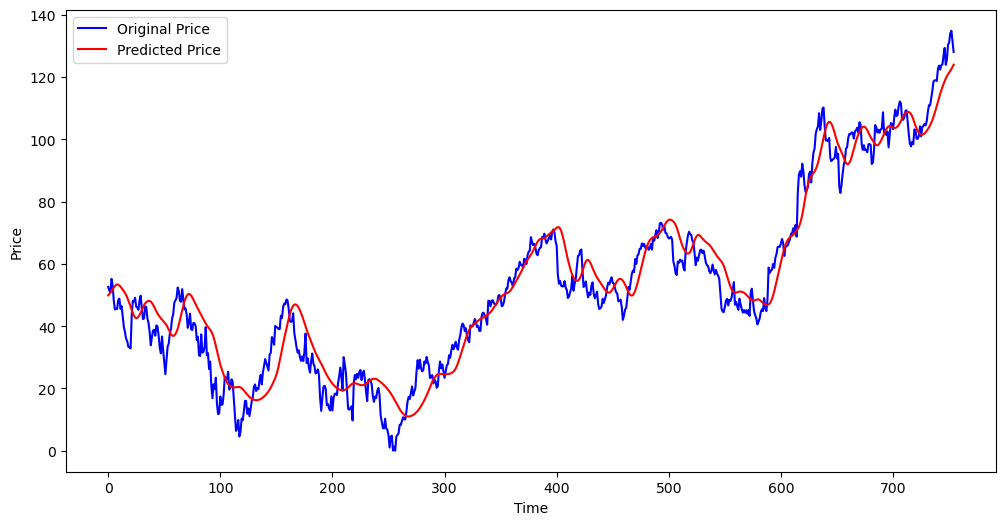

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Price')
plt.plot(y_predicted, 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()